### Download CIFAR-10

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch

In [10]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms
data_path = '../orig_data/p1ch6/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


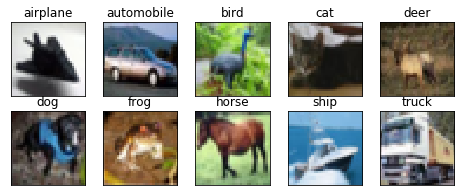

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [7]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F75705EDA90>,
 1,
 'automobile')

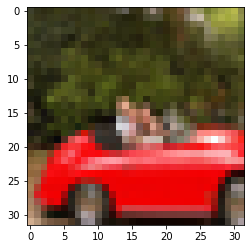

In [8]:
plt.imshow(img)
plt.show()

### Dataset Transforms

In [9]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

ToTensor

In [7]:
from torchvision.transforms import ToTensor
to_tensor = ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

Whole datasets


In [13]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [14]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [15]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

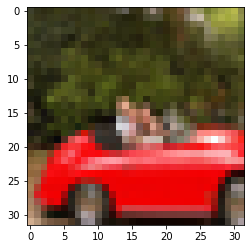

In [16]:
# Change data order from CxHxW to HxWxC
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

### Normalizing data

In [19]:
# stack the whole dataset
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [20]:
# compute mean per channel
imgs.view(3, -1).mean(dim=1)
# view(3, -1) keeps 3 channels, and merges rest dimensions into 1, so 3x32x32 -> 3x1024

tensor([0.4914, 0.4822, 0.4465])

In [21]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [23]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [11]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)),
]))

transformed_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)),
]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


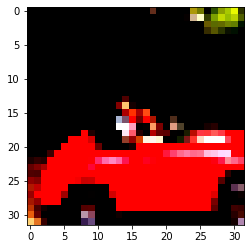

In [28]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

### Build The Dataset

In [12]:
label_map = {0: 0, 2:1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0, 2]]

cifar2[0]

(tensor([[[ 0.6143, -0.3224, -0.1160,  ..., -0.2589, -0.2748, -0.5447],
          [ 0.6620, -0.1478, -0.8463,  ..., -0.3224, -0.3224, -0.5764],
          [ 0.2333,  0.2650, -0.1001,  ..., -0.3383, -0.6558, -0.7511],
          ...,
          [ 0.2174,  0.2650,  0.1539,  ..., -0.5764, -0.4494,  0.0110],
          [ 0.5984,  0.4397,  0.3285,  ..., -0.6399, -0.4335,  0.0269],
          [ 0.9160,  0.8048,  0.4556,  ..., -0.4971, -0.5447, -0.0525]],
 
         [[ 1.3373,  0.2744,  0.4033,  ...,  0.3871,  0.3871,  0.0973],
          [ 1.4501,  0.5965, -0.2248,  ...,  0.3066,  0.3066,  0.0650],
          [ 1.0958,  1.1280,  0.6448,  ...,  0.2583, -0.0477, -0.1282],
          ...,
          [ 0.4033,  0.5160,  0.5321,  ...,  0.1778,  0.4033,  0.8542],
          [ 0.5482,  0.6609,  0.6609,  ...,  0.1134,  0.4033,  0.8864],
          [ 0.4838,  0.9508,  0.4999,  ...,  0.1778,  0.1617,  0.7576]],
 
         [[-0.4476, -0.7924, -0.1927,  ..., -0.6125, -0.6724, -0.8523],
          [-0.4476, -0.9723,

Fully Connected Net

In [32]:
n_out = 2 # number of classes
model = nn.Sequential(
    nn.Linear(3072, 512), #input features, 3x32x32
    nn.Tanh(),
    nn.Linear(512, n_out), #input features
)

Representing output as probabilities

In [ ]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [36]:
softmax = nn.Softmax(dim=1) # dimension 0 is the batch size
x = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [46]:
model = nn.Sequential(
    nn.Linear(3072, 512), #input features, 3x32x32
    nn.Tanh(),
    nn.Linear(512, n_out), #input features
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


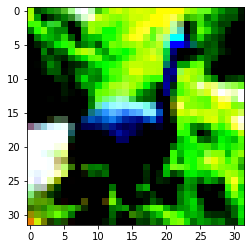

In [50]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [57]:
img_batch = img.view(-1).unsqueeze(0) # add the batch dimension first
out = model(img_batch)
out # probabilities

tensor([[0.5058, 0.4942]], grad_fn=<SoftmaxBackward>)

In [56]:
_, index = torch.max(out, dim=1)
class_names[index]

'airplane'

Loss for Classification

Neegative  log  likelihood(NLL),  has the expression

```python
    NLL = - sum(log(out_i[c_i]))
```
 where the sum is taken over ```N``` samples and ```c_i``` is the correct class for sample i.

<img src="../resources/nll.jpg" alt="nll" height="200">

For each sample in the batch:
* Run the forward pass, and obtain the output values from the last (linear) layer.
* Compute their softmax, and obtain probabilities.
* Take  the  predicted  probability  corresponding  to  the  correct  class  (the  likeli-hood of the parameters).
Note that we know what the correct class is because it’s a supervised problem—it’s our ground truth.
* Compute its logarithm, slap a minus sign in front of it, and add it to the loss

In [ ]:
model = nn.Sequential(
    nn.Linear(3072, 512), #input features, 3x32x32
    nn.Tanh(),
    nn.Linear(512, n_out), #input features
    nn.Softmax(dim=1)
)

loss = nn.NLLLoss()

img, label = cifar2[0]
img_batch = img.view(-1).unsqueeze(0) # add the batch dimension first
out = model(img_batch)
loss(out, torch.tensor([label]))

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))


Epoch: 0, Loss: 4.029162
Epoch: 1, Loss: 2.152436
Epoch: 2, Loss: 9.393344
Epoch: 3, Loss: 3.240133
Epoch: 4, Loss: 5.000225
Epoch: 5, Loss: 6.827040
Epoch: 6, Loss: 11.947562
Epoch: 7, Loss: 13.136554
Epoch: 8, Loss: 2.320431
Epoch: 9, Loss: 8.847281
Epoch: 10, Loss: 10.981117
Epoch: 11, Loss: 10.388735
Epoch: 12, Loss: 12.994087
Epoch: 13, Loss: 11.049661
Epoch: 14, Loss: 7.718806
Epoch: 15, Loss: 13.475115
Epoch: 16, Loss: 15.989767
Epoch: 17, Loss: 15.481117
Epoch: 18, Loss: 9.136665
Epoch: 19, Loss: 8.017452
Epoch: 20, Loss: 6.796265
Epoch: 21, Loss: 9.398929
Epoch: 22, Loss: 5.274921
Epoch: 23, Loss: 12.013548
Epoch: 24, Loss: 11.189844
Epoch: 25, Loss: 7.609928
Epoch: 26, Loss: 13.773382
Epoch: 27, Loss: 0.527909
Epoch: 28, Loss: 2.348020
Epoch: 29, Loss: 2.227604
Epoch: 30, Loss: 5.681875
Epoch: 31, Loss: 13.424394
Epoch: 32, Loss: 15.597946
Epoch: 33, Loss: 15.438913
Epoch: 34, Loss: 6.399003
Epoch: 35, Loss: 14.950302
Epoch: 36, Loss: 14.086979
Epoch: 37, Loss: 3.048041
Epoch

### DataLoaders

In [20]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.494735
Epoch: 1, Loss: 0.478334
Epoch: 2, Loss: 0.684159
Epoch: 3, Loss: 0.384249
Epoch: 4, Loss: 0.400366
Epoch: 5, Loss: 0.417919
Epoch: 6, Loss: 0.478910
Epoch: 7, Loss: 0.366656
Epoch: 8, Loss: 0.224660
Epoch: 9, Loss: 0.241493
Epoch: 10, Loss: 0.542743
Epoch: 11, Loss: 0.400197
Epoch: 12, Loss: 0.467680
Epoch: 13, Loss: 0.328280
Epoch: 14, Loss: 0.340988
Epoch: 15, Loss: 0.217939
Epoch: 16, Loss: 0.200084
Epoch: 17, Loss: 0.569019
Epoch: 18, Loss: 0.392996
Epoch: 19, Loss: 0.199913
Epoch: 20, Loss: 0.305369
Epoch: 21, Loss: 0.160980
Epoch: 22, Loss: 0.154472
Epoch: 23, Loss: 0.286089
Epoch: 24, Loss: 0.173660
Epoch: 25, Loss: 0.271764
Epoch: 26, Loss: 0.225361
Epoch: 27, Loss: 0.153596
Epoch: 28, Loss: 0.156224
Epoch: 29, Loss: 0.156746
Epoch: 30, Loss: 0.151937
Epoch: 31, Loss: 0.260655
Epoch: 32, Loss: 0.288485
Epoch: 33, Loss: 0.247932
Epoch: 34, Loss: 0.104775
Epoch: 35, Loss: 0.371168
Epoch: 36, Loss: 0.432631
Epoch: 37, Loss: 0.110346
Epoch: 38, Loss: 0.232

Validation

In [24]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        print(predicted)
        total += labels.shape[0]
        correct += int((predicted==labels).sum())
print('Accuracy: {:.4f}'.format(correct/total))


tensor([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1])
tensor([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])
tensor([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0])
tensor([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1])
tensor([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

Deeper model

In [25]:
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
)
loss_fn = nn.CrossEntropyLoss()

In [28]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.791668
Epoch: 1, Loss: 0.739214
Epoch: 2, Loss: 0.698596
Epoch: 3, Loss: 0.671935
Epoch: 4, Loss: 0.650961
Epoch: 5, Loss: 0.630245
Epoch: 6, Loss: 0.607445
Epoch: 7, Loss: 0.581845
Epoch: 8, Loss: 0.553634
Epoch: 9, Loss: 0.523560
Epoch: 10, Loss: 0.492612
Epoch: 11, Loss: 0.461583
Epoch: 12, Loss: 0.430875
Epoch: 13, Loss: 0.400646
Epoch: 14, Loss: 0.371061
Epoch: 15, Loss: 0.342391
Epoch: 16, Loss: 0.314944
Epoch: 17, Loss: 0.288975
Epoch: 18, Loss: 0.264634
Epoch: 19, Loss: 0.241933
Epoch: 20, Loss: 0.220750
Epoch: 21, Loss: 0.200881
Epoch: 22, Loss: 0.182126
Epoch: 23, Loss: 0.164350
Epoch: 24, Loss: 0.147519
Epoch: 25, Loss: 0.131674
Epoch: 26, Loss: 0.116771
Epoch: 27, Loss: 0.102873
Epoch: 28, Loss: 0.090409
Epoch: 29, Loss: 0.076101
Epoch: 30, Loss: 0.076634
Epoch: 31, Loss: 0.054458
Epoch: 32, Loss: 0.049640
Epoch: 33, Loss: 0.038500
Epoch: 34, Loss: 0.050334
Epoch: 35, Loss: 0.106446
Epoch: 36, Loss: 0.016923
Epoch: 37, Loss: 0.021187
Epoch: 38, Loss: 0.021

In [29]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [30]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

Accuracy: 0.811000


In [33]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])